# Final Project (part 7)
#### By Shubhankar Kumar

### 7. Identifying most prolific committers

In [3]:
commits_df = spark.read.parquet("gs://msca-bdp-data-open/final_project_git/commits")

In [5]:
from pyspark.sql.functions import from_unixtime
from pyspark.sql.functions import col, regexp_extract
commits_df = commits_df.withColumn(
    "date",
    col("committer.time_sec")
)
commits_df = commits_df.withColumn("timestamp", from_unixtime("date"))
commits_df = commits_df.drop("date")

from pyspark.sql.functions import year
import matplotlib.pyplot as plt

commits_df = commits_df.withColumn("year", year(col("timestamp")))

commits_df_new = commits_df.filter((year("timestamp") >= 2000) & (year("timestamp") <= 2023))
commits_df_new = commits_df_new.drop("year", "month")

In [6]:
del commits_df

In [8]:
selected_columns = ["committer", "commit"]
commits_df_selected = commits_df_new.select(*selected_columns)

In [9]:
from pyspark.sql.functions import count

# Grouping by committer and calculate commit count
committer_commit_counts = commits_df_selected.groupBy("committer.name").agg(count("commit").alias("commit_count"))

# Ordering by commit count in descending order
top_committers = committer_commit_counts.orderBy(col("commit_count").desc())

# Showing the top N most prolific committers
top_n_committers = top_committers.limit(10)
top_n_committers.show(truncate=False)

+--------------------+------------+
|name                |commit_count|
+--------------------+------------+
|GitHub              |21511216    |
|Duane F. King       |597940      |
|Gerrit Code Review  |597187      |
|devs-mycroft        |524440      |
|Marge Spiderworthy  |495786      |
|Commit Bot          |421632      |
|Curt Clifton        |384915      |
|James Michael DuPont|343198      |
|CI Pool Resource    |316075      |
|root                |312814      |
+--------------------+------------+



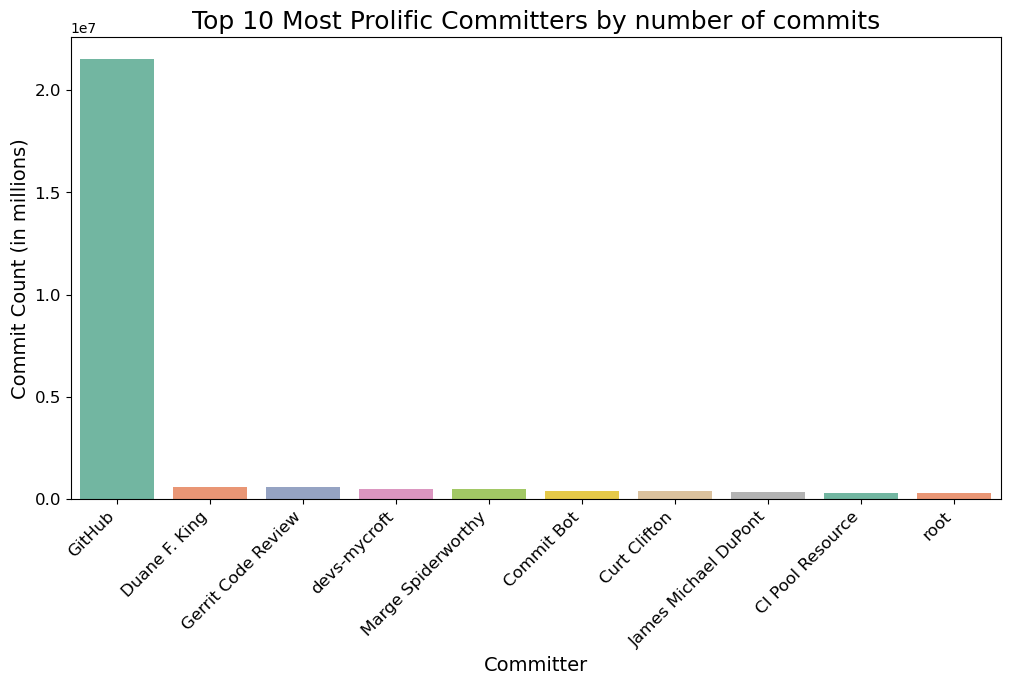

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n_committers_pd = top_n_committers.toPandas()
plt.figure(figsize=(12, 6))
sns.barplot(x="name", y="commit_count", data=top_n_committers_pd, palette="Set2")
plt.title('Top 10 Most Prolific Committers by number of commits', fontsize=18)
plt.ylabel('Commit Count (in millions)', fontsize=14)
plt.xlabel('Committer', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.savefig("prolific_committers.png")
plt.show()

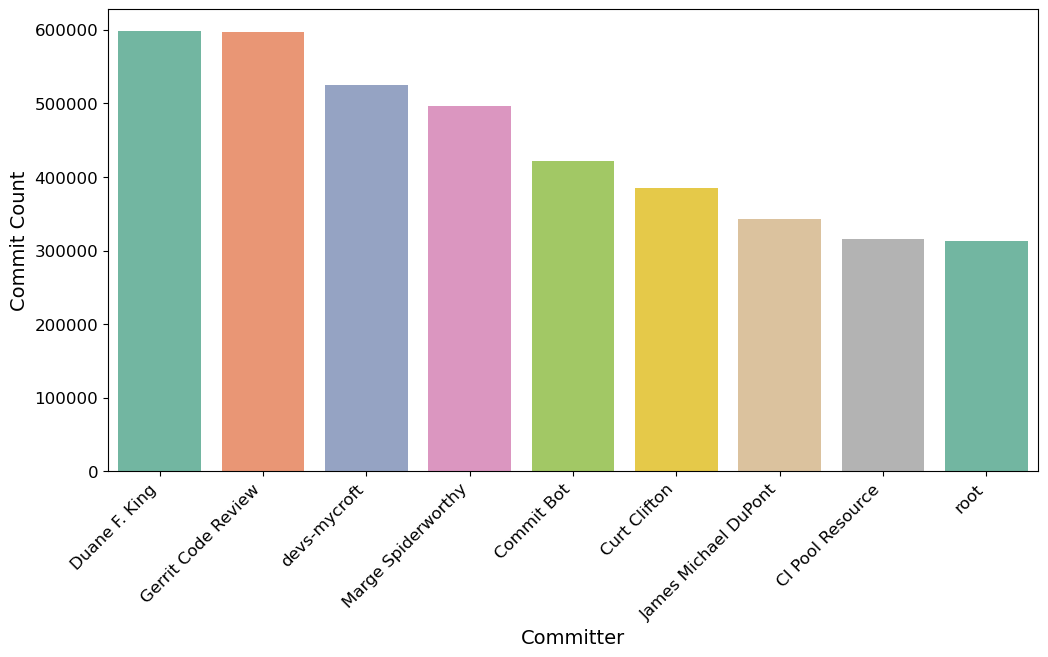

In [17]:
filtered_top_n_committers_pd = top_n_committers_pd[top_n_committers_pd['name'] != 'GitHub']
plt.figure(figsize=(12, 6))
sns.barplot(x="name", y="commit_count", data=filtered_top_n_committers_pd, palette="Set2")
plt.ylabel('Commit Count', fontsize=14)
plt.xlabel('Committer', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.savefig("prolific_committers_new.png")
plt.show()